# tests of band_width() and gauss_kernel() function.     

**kernel.utils.functions.band_width**    
*class kernel.utils.functions.band_width(data, method=None, weights=None)*

**Parameters:**   

method: str
>method to calculate bandwidth   
 - Median heuristic   
 - Scott heuristic   
 - Silverman heuristic   
 - LSCV   
 - LCV   

data: array_like    
>Datapoints to estimate.   
1D-array: [x_1,x_2,...,x_n]   
1D-array input is treated as 1-dimensional data: [[x_1],[x_2],...,[x_n]]     
2D-array: [[x_1^d1,x_1^d2], [x_2^d1,x_2^d2],...,[x_n^d1,x_n^d2]]   

weights: array_like   
>weights of datapoints. This must be the same shape as dataset.   
 
**Attributes**   
cov:   
>The covariance matrix of dataset, scaled by the calculated bandwidth. 
 
inv_cov:   
>The inverse of covariance.

**kernel.utils.functions.gauss_kernel**    
*class kernel.utils.functions.gauss_kernel(covariance, n_features)*

**Parameters:**    

covariance: array_like
>2D-array: Covariance matrix $\Sigma$
The covariance matrix of dataset, scaled by the calculated bandwidth.   
 
n_features: int   
>dimention of data. $d$
 
**Attributes:**     
cov:   
>The covariance matrix of dataset, scaled by the calculated bandwidth. $\Sigma$   

inv_cov:
>The inverse of covariance: $Q$

*pdf(x,y,normalize=False)*:   
>probability density function estimated by gauss kernel functions.  
if normalize is False, normalize factor = 1.
\begin{equation}
              pdf(x,y)=\frac{\exp\{-0.5(x-y)^T Q (x-y)\}}{\sqrt{2\pi^d|\Sigma|}}
\end{equation}  

*logpdf(x,y,normalize=False)*:   
>Log pdf
\begin{equation}
              logpdf(x,y)=-0.5(x-y)^T Q (x-y) - \log\left(\sqrt{2\pi^d|\Sigma|}\right)
\end{equation}  



norm_factor: 
> normalized factor of pdf.  $\sqrt{2\pi^d|\Sigma|}$   

*grad(x,y,normalize=False)*:  
> gradient of pdf(x,y).

*grad_logpdf(x,y)*:   
> gradient of logpdf(x,y)

In [18]:
import sys
sys.path.append('../../../../')
from src import kernel
import numpy as np
import scipy as scp
import seaborn as sns

Data making

In [19]:
np.random.seed(1)
test = np.atleast_2d(np.r_[np.random.normal(0,1,100),np.random.normal(4,1,100)]).T
x = np.linspace(-10,10,100)
y = 0.5*scp.stats.norm.pdf(x,0,1)+0.5*scp.stats.norm.pdf(x,4,1)

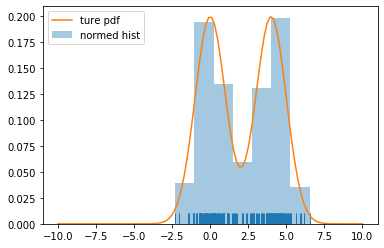

In [20]:
sns.distplot(test,rug=True, kde=False,hist=True,norm_hist=True,label='normed hist')
sns.lineplot(x,y,label='ture pdf')

calculate for kernel band width

In [21]:
bw = kernel.utils.functions.band_width(test,method='LCV')
bw_silverman = kernel.utils.functions.band_width(test,method='silverman')
bw_scott = kernel.utils.functions.band_width(test,method='scott')
bw_median = kernel.utils.functions.band_width(test,method='median')

[I 2019-12-28 04:15:51,595] Finished trial#0 resulted in value: 6.832300816449954. Current best value is 6.832300816449954 with parameters: {'h0': 4.779363941025386e-05}.
[I 2019-12-28 04:15:51,635] Setting status of trial#1 as TrialState.PRUNED. 
[I 2019-12-28 04:15:51,787] Setting status of trial#2 as TrialState.PRUNED. 
[I 2019-12-28 04:15:51,939] Setting status of trial#3 as TrialState.PRUNED. 
[I 2019-12-28 04:15:52,210] Finished trial#4 resulted in value: 2.2972573900090336. Current best value is 2.2972573900090336 with parameters: {'h0': 4.2629826333410215}.
[I 2019-12-28 04:15:52,383] Finished trial#5 resulted in value: 2.021733579479752. Current best value is 2.021733579479752 with parameters: {'h0': 0.3745123788810699}.
[I 2019-12-28 04:15:52,420] Setting status of trial#6 as TrialState.PRUNED. 
[I 2019-12-28 04:15:52,576] Setting status of trial#7 as TrialState.PRUNED. 
[I 2019-12-28 04:15:52,868] Finished trial#8 resulted in value: 2.092414302836908. Current best value is 2

In [22]:
kernel_cv = kernel.utils.functions.gauss_kernel(covariance=bw.cov,n_features=1)
kernel_scott = kernel.utils.functions.gauss_kernel(covariance=bw_scott.cov,n_features=1)
kernel_silverman = kernel.utils.functions.gauss_kernel(covariance=bw_silverman.cov,n_features=1)
kernel_median = kernel.utils.functions.gauss_kernel(covariance=bw_median.cov,n_features=1)

In [24]:
kde_cv = np.average(kernel_cv.pdf(np.atleast_2d(x).T,test,normalize=True),axis=1)
kde_scott = np.average(kernel_scott.pdf(np.atleast_2d(x).T,test,normalize=True),axis=1)
kde_silverman = np.average(kernel_silverman.pdf(np.atleast_2d(x).T,test,normalize=True),axis=1)
kde_median = np.average(kernel_median.pdf(np.atleast_2d(x).T,test,normalize=True),axis=1)

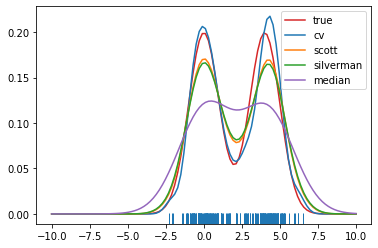

In [38]:
sns.lineplot(x,y,label='true',color='C3')
sns.lineplot(x,kde_cv,label='cv',color='C0')
sns.lineplot(x,kde_scott,label='scott',color='C1')
sns.lineplot(x,kde_silverman,label='silverman',color='C2')
sns.lineplot(x,kde_median,label='median',color='C4')
sns.distplot(test,rug=True,hist=False,kde=False)

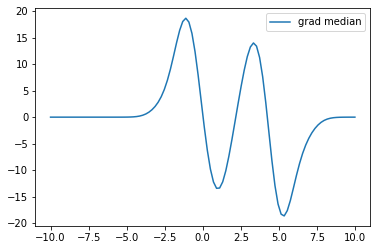

In [41]:
sns.lineplot(x,kernel_scott.grad(np.atleast_2d(x).T,test,normalize=True).sum(axis=1).ravel(),label='grad median')